# Create a geographical map of Canada

['Newfoundland and Labrador / Terre-Neuve-et-Labrador'
 'Prince Edward Island / Île-du-Prince-Édouard'
 'Nova Scotia / Nouvelle-Écosse' 'New Brunswick / Nouveau-Brunswick'
 'Quebec / Québec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia / Colombie-Britannique' 'Yukon'
 'Northwest Territories / Territoires du Nord-Ouest' 'Nunavut']
<class 'pandas.core.series.Series'>


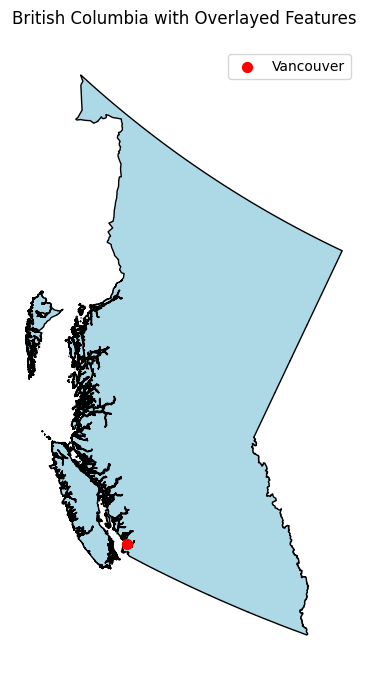

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString


# Load the full shapefile
gdf = gpd.read_file("lpr_000b16a_e/lpr_000b16a_e.shp")
print(gdf["PRNAME"].unique())
print(type(gdf["PRNAME"]))

# Filter to BC
bc = gdf[gdf["PRNAME"].str.contains("British Columbia")]

# Define Vancouver point in lon/lat (WGS84)
vancouver_point = gpd.GeoDataFrame(
    geometry=[Point(-123.1207, 49.2827)],
    crs="EPSG:4326"  # WGS 84
)

# Reproject to match BC shapefile CRS
vancouver_proj = vancouver_point.to_crs(bc.crs)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8), dpi = 100)
bc.plot(ax=ax, edgecolor="black", color="lightblue")
vancouver_proj.plot(ax=ax, color='red', markersize=50, label='Vancouver')

ax.set_title("British Columbia with Overlayed Features")
ax.legend()
ax.axis('off')
plt.show()

# Prepare municipal boundaries for the map

In [2]:
# Load municipal polygon data
muni_gdf = gpd.read_file("BCGW_02001F02_1747091351300_2028/ABMS_MUNICIPALITIES_SP/ABMS_MUNI_polygon.shp")

# Optional: Check what you loaded
print(muni_gdf.columns)
print(muni_gdf.head())
print(muni_gdf.crs)

muni_gdf = muni_gdf.to_crs(bc.crs)  # bc is your British Columbia GeoDataFrame

Index(['AA_ID', 'AA_NAME', 'ABRVN', 'BDY_TYPE', 'AA_PARENT', 'CHNG_ORG',
       'UPT_TYPE', 'UPT_DATE', 'MAP_STATUS', 'OC_M_NMBR', 'OC_M_YR',
       'OC_M_TYPE', 'WBST_RL', 'IMAGE_URL', 'AFCTD_AREA', 'AREA_SQM',
       'LENGTH_M', 'SHAPE', 'OBEJCTID', 'geometry'],
      dtype='object')
   AA_ID                   AA_NAME          ABRVN BDY_TYPE  \
0     67        District of Taylor         Taylor      LGL   
1     73  Village of Daajing Giids  Daajing Giids      LGL   
2     74         Village of Masset         Masset      LGL   
3     75  Village of Port Clements  Port Clements      LGL   
4     76   District of Port Edward    Port Edward      LGL   

                       AA_PARENT CHNG_ORG UPT_TYPE  UPT_DATE    MAP_STATUS  \
0  Peace River Regional District     MUNI        E      None  Not Appended   
1  North Coast Regional District     MUNI        E  20220817  Not Appended   
2  North Coast Regional District     MUNI        E  20130303  Not Appended   
3  North Coast Regional Dist

# Project the munical boundaries to the same coordinate system as the base map

Add basic elements to the map, dots, lines and polygons.

Some polygons have concrete meaning, like a lake or a park. **These polygons may be found from a shapefile through websites.**

['Newfoundland and Labrador / Terre-Neuve-et-Labrador'
 'Prince Edward Island / Île-du-Prince-Édouard'
 'Nova Scotia / Nouvelle-Écosse' 'New Brunswick / Nouveau-Brunswick'
 'Quebec / Québec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia / Colombie-Britannique' 'Yukon'
 'Northwest Territories / Territoires du Nord-Ouest' 'Nunavut']
<class 'pandas.core.series.Series'>


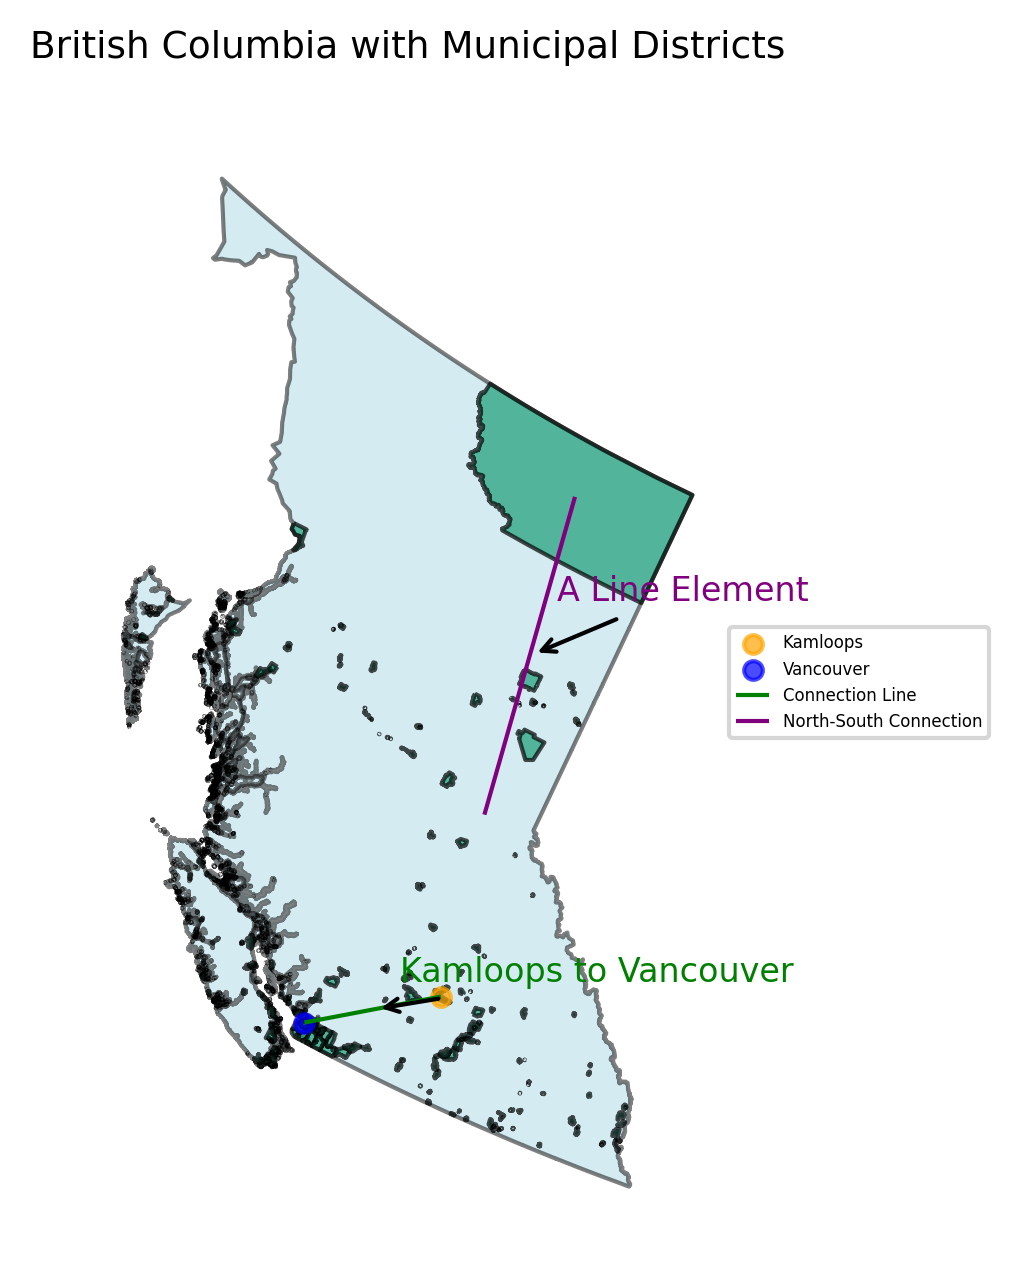

In [ ]:
import random
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

fig, ax = plt.subplots(dpi = 300)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Load the full shapefile
gdf = gpd.read_file("lpr_000b16a_e/lpr_000b16a_e.shp")
print(gdf["PRNAME"].unique())
print(type(gdf["PRNAME"]))
# Filter to BC
bc = gdf[gdf["PRNAME"].str.contains("British Columbia")]
bc.plot(ax=ax, edgecolor="black", color="lightblue", alpha = 0.5)


# Load municipal polygon data
muni_gdf = gpd.read_file("BCGW_02001F02_1747091351300_2028/ABMS_MUNICIPALITIES_SP/ABMS_MUNI_polygon.shp")
muni_gdf = muni_gdf.to_crs(bc.crs)  # bc is your British Columbia GeoDataFrame
muni_gdf.plot(ax=ax, edgecolor="black", color='#1b9e77', alpha=0.7)

# Define Kamloops point in lon/lat (WGS84)
kamloops_point = gpd.GeoDataFrame(
    geometry=[Point(-120.3273, 50.6745)],
    crs="EPSG:4326"  # WGS 84
)
# Reproject to match BC shapefile CRS
kamloops_proj = kamloops_point.to_crs(bc.crs)
# Plot Kamloops point
kamloops_proj.plot(ax=ax, color='orange', markersize=20, alpha = 0.7, label='Kamloops')


# Define Vancouver point in lon/lat (WGS84)
vancouver_point = gpd.GeoDataFrame(
    geometry=[Point(-123.1207, 49.2827)],
    crs="EPSG:4326"  # WGS 84
)
# Reproject to match BC shapefile CRS
vancouver_proj = vancouver_point.to_crs(bc.crs)
# Plot Vancouver point
vancouver_proj.plot(ax=ax, color='blue', markersize=20, alpha=0.7, label='Vancouver')


# Create a line connecting Vancouver and Kamloops
line = LineString([vancouver_proj.geometry.iloc[0], kamloops_proj.geometry.iloc[0]])

# Plot the line
gpd.GeoSeries([line]).plot(ax=ax, color='green', linewidth=1, label='Connection Line')

# Add annotation near the line
midpoint = line.interpolate(0.5, normalized=True)
ax.annotate("Kamloops to Vancouver", xy=(midpoint.x, midpoint.y), xytext=(midpoint.x + 50000, midpoint.y + 50000),
            arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=8, color='green')


# Choose the northernmost and southernmost points from the municipalities GeoDataFrame
northern_point = muni_gdf.geometry.iloc[muni_gdf.geometry.centroid.y.idxmax()].centroid
southern_point = muni_gdf.geometry.iloc[muni_gdf.geometry.centroid.y.idxmin()].centroid
southern_point = Point(southern_point.x - 100000, southern_point.y + 600000)

# Create a line connecting the northernmost and southernmost points
specific_line = LineString([northern_point, southern_point])

# Plot the line
gpd.GeoSeries([specific_line]).plot(ax=ax, color='purple', linewidth=1, label='A Connection')

# Add annotation near the line
specific_midpoint = specific_line.interpolate(0.5, normalized=True)
ax.annotate("A Random Line Element", xy=(specific_midpoint.x, specific_midpoint.y), 
            xytext=(specific_midpoint.x + 50000 , specific_midpoint.y + 100000),
            arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=8, color='purple')


# Add legend and formatting
plt.title("British Columbia with Municipal Districts", fontsize=9)
plt.axis("off")
plt.legend(fontsize=4, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("results/test_BC_map.png")
plt.show()